# Exercise 2

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from scipy.stats import genpareto
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv

np.random.seed(1234)

In [2]:
def make_data(n, p, mean=0, cov=1):
    mean_vector = np.full((p,), mean)
    
    cov_diag = np.full((p,), cov)
    cov_matrix = np.diagflat(cov_diag)
   
    a, m = 3., 2. 
    observations_x = ((np.random.pareto(a, n*p) + 1) * m).reshape(n, p)
    
    observations_y = np.random.randn(n)
    
    
    return observations_x, observations_y

In [3]:
def linear_regression(train_X, train_Y, test_X, test_Y):
    regression_model = Ridge(alpha=1)
    regression_model.fit(train_X, train_Y)

    train_results = regression_model.predict(train_X)
    test_results = regression_model.predict(test_X)

    train_error = mean_squared_error(train_Y, train_results)
    test_error = mean_squared_error(test_Y, test_results)
    parameters_norm = np.linalg.norm(regression_model.coef_)
    
    return train_error, test_error, parameters_norm

In [4]:
def test_regression(train_X, train_Y, test_X, test_Y, p):
    train_X = train_X[:,:p]
    test_X = test_X[:,:p]
    
    train_error, test_error, parameters_norm = linear_regression(train_X, train_Y, test_X, test_Y)
    
    return train_error, test_error, parameters_norm

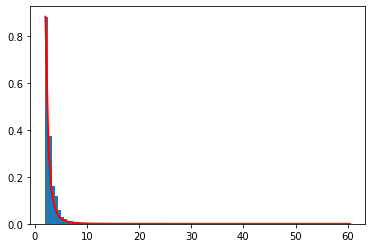

In [5]:
a, m = 3., 2.
observations_x = ((np.random.pareto(a, 1000) + 1) * m)
count, bins, _ = plt.hist(observations_x, 100, density=True)
fit = a*m**a / bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.show()

In [6]:
n_train = 200
n_test = 100
max_features = 1000

train_X, train_Y = make_data(n_train, max_features, mean=0, cov=1)
test_X, test_Y = make_data(n_test, max_features, mean=0, cov=1)

ps = []
train_errors = []
test_errors = []
parameters_norms = []
with open('linear_regression_results.csv', 'w', newline='') as fout:
    writer = csv.DictWriter(fout, fieldnames=['# parameters', 'train loss', 'test loss', 'parameters norm'])
    writer.writeheader()
    for p in range(1, max_features, 50):
        train_error, test_error, parameters_norm = test_regression(train_X, train_Y, test_X, test_Y, p)
        ps.append(p)
        train_errors.append(train_error)
        test_errors.append(test_error)
        parameters_norms.append(parameters_norm)

        print('p: {} | train loss: {:.5f}; test loss: {:.5f}; norm: {:.5f}'.format(p, train_error, test_error, parameters_norm))

        writer.writerow({
            '# parameters': p,
            'train loss': train_error,
            'test loss': test_error,
            'parameters norm': parameters_norm
        })

p: 1 | train loss: 0.93665; test loss: 0.81130; norm: 0.04447
p: 51 | train loss: 0.68048; test loss: 1.57902; norm: 0.45220
p: 101 | train loss: 0.46078; test loss: 2.36274; norm: 0.64794
p: 151 | train loss: 0.17126; test loss: 4.29451; norm: 1.06869
p: 201 | train loss: 0.02088; test loss: 8.10738; norm: 1.86726
p: 251 | train loss: 0.00027; test loss: 4.18731; norm: 1.23821
p: 301 | train loss: 0.00004; test loss: 2.60836; norm: 0.84247
p: 351 | train loss: 0.00001; test loss: 1.85458; norm: 0.68239
p: 401 | train loss: 0.00001; test loss: 1.74660; norm: 0.59364
p: 451 | train loss: 0.00000; test loss: 1.37551; norm: 0.54277
p: 501 | train loss: 0.00000; test loss: 1.26408; norm: 0.49203
p: 551 | train loss: 0.00000; test loss: 1.06484; norm: 0.45413
p: 601 | train loss: 0.00000; test loss: 1.00810; norm: 0.42072
p: 651 | train loss: 0.00000; test loss: 1.00700; norm: 0.39735
p: 701 | train loss: 0.00000; test loss: 1.02057; norm: 0.38132
p: 751 | train loss: 0.00000; test loss: 1.

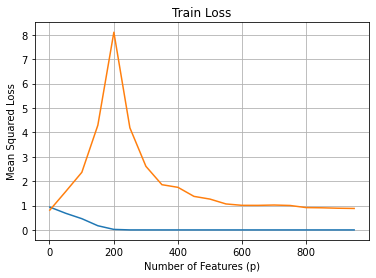

In [7]:
fig, ax = plt.subplots()
ax.plot(ps, train_errors)
plt.plot(ps, test_errors)

ax.set(xlabel='Number of Features (p)', ylabel='Mean Squared Loss',
       title='Train Loss')
ax.grid()

(0.0, 30.0)

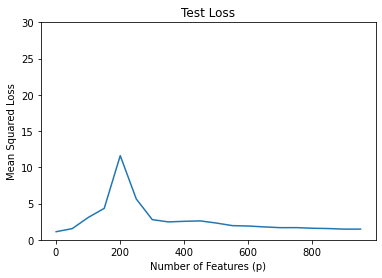

In [14]:
plt.xlabel('Number of Features (p)')
plt.ylabel('Mean Squared Loss')
plt.title('Test Loss')
plt.plot(ps, test_errors)
plt.ylim(0, 30)

(0.0, 5.0)

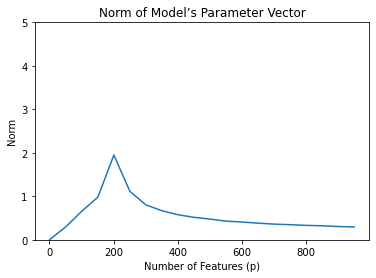

In [15]:
plt.xlabel('Number of Features (p)')
plt.ylabel('Norm')
plt.title('Norm of Model’s Parameter Vector')
plt.plot(ps, parameters_norms)
plt.ylim(0, 5)